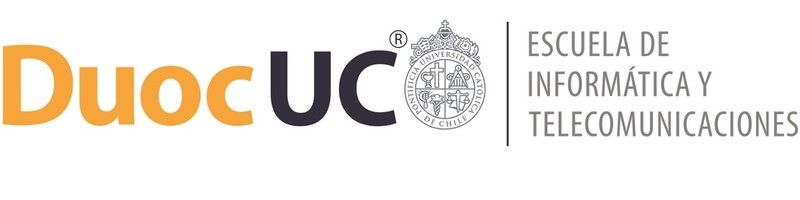

# Informe Técnico - Examen Transversal


Integrantes:Pamela Aldana
Nicole Asenjo
*
*


# Caso Fundamentos de Machine Learning

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Gana","Pierde"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

In [2]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
pd.set_option('display.max_columns', None)
import seaborn as sns
from seaborn import boxplot
from numpy import array

# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",None)
import math as mat

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import datetime as dt
import missingno as msno

%matplotlib inline




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#rt ="/content/drive/MyDrive/Base_clientes_Monopoly THIS.xlsx"
rt="/content/drive/MyDrive/solo_base__clientes_Monopoly.xlsx"

df = pd.read_excel(rt)
df.head(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,IndRev_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,IndRev_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,IndRev_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,IndRev_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,IndRev_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,TxsDebCom_T07,FacDebAtm_T07,TxsDebAtm_T07,Col_T07,ColL1T0_T07,ColL1TE_T07,ColL2T0_T07,ColL2AC_T07,ColL2CC_T07,ColMx_T07,PagoNac_T07,PagoInt_T07,EeccNac_T07,EeccInt_T07,UsoL1_T07,UsoL2_T07,UsoLI_T07,IndRev_T07,FlgAct_T06,FlgActCN_T06,FlgActCI_T06,FlgActAN_T06,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,IndRev_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T

#FASE 1 : COMPRENDER EL NEGOCIO
El caso "Banco Monopoly/Dormammu"
El banco extranjero llamado "Dormammu" adquiere el banco chileno Monopoly . Dormammu ha encargado a sus ingenieros realizar un análisis de los clientes de Monopoly, comprendiendo su comportamiento y patrones de uso de productos financieros, con el objetivo de desarrollar una estrategia efectiva para abordar este nuevo mercado.

En la base de datos hay que utilizar metodologia Crisp-DM, seleccionar las variables relevantes para su interpretación y proporcionar la información necesaria a los propietarios de Dormammu para que puedan comprender a los clientes de Monopoly y desarrollar una estrategia efectiva para abordar este nuevo mercado.

Variable Descripción

Región = Región de Residencia

Renta = Renta del cliente

Sexo = Sexo

Subsegmento = Subsegmento

Edad = Edad

Adicional = Indicador de Tenencia de TC adicionales

Antiguedad = Antigüedad del cliente (meses)

CambioPin = Indicador del cambio de clave secreta de la tarjeta

Consumo = Indicador de Crédito de Consumo

Debito = Indicador de Tenencia de TD

Ctacte = Indicador de Cuenta Corriente

Cuentas = Número de cuentas que tiene el cliente

Hipotecario = Indicador de Crédito Hipotecario

Internauta = Indicador de cliente Internauta que usa la web del banco

Monoproducto = Indicador de si el cliente es solo poseedor de una TC

TC = Número de TC que tiene el cliente

Dualidad = Indicador de Dualidad (Cliente es dual si tiene 2 o más TC)

CUPO_L1 = Cupo de la tarjeta crédito para compras nacionales

CUPO_MX = Cupo de la tarjeta crédito para compras internacionales

CUPO_L2 = Cupo de la tarjeta crédito para avances en cuotas

Col_T12 = Colocación del cliente en TC en el mes X

ColL1TE_T12 = Revolving del cliente en TC en el mes X

EeccInt_T12 = Monto internacional exigido en el estado de cuenta del cliente en el mes X

EeccNac_T12 = Monto nacional exigido en el estado de cuenta del cliente en el mes X

Fac_T12 Monto = facturado por el cliente en TC en el mes X

FacAI_T12 = Monto facturado en avances internacionales por el cliente en TC en el mes X

FacAN_T12 = Monto facturado en avances nacionales por el cliente en TC en el mes X

FacCCOT_T12 = Monto facturado en compras en cuotas con tasa por el cliente en TC en el mes X

FacCCPC_T12 = Monto facturado en compras en cuotas precio contado por el cliente en TC en el mes X

FacCI_T12 = Monto facturado en compras internacionales por el cliente en TC en el mes X

FacCN_T12 = Monto facturado en compras nacionales por el cliente en TC en el mes X

FacCOL_T12 = Monto facturado en avances en cuotas por el cliente en TC en el mes X

FacDebAtm_T12 = Monto facturado en avances por el cliente en TD en el mes X

FacDebCom_T12 = Monto facturado en compras por el cliente en TD en el mes X

FacPAT_T12 = Monto facturado en PAT por el cliente en TC en el mes X

FlgAct_T12 = Indicador de actividad en el mes X en la TC

FlgActAI_T12 = Indicador de actividad en avances internacionales en el mes X en la TC

FlgActAN_T12 = Indicador de actividad en avances nacionales en el mes X en la TC

FlgActCCOT_T12 = Indicador de actividad en compras nacionales en cuotas con tasa en el mes X en la TC

FlgActCCPC_T12 = Indicador de actividad en compras nacionales en cuotas precio contado en el mes X en la TC

FlgActCI_T12 = Indicador de actividad en compras internacionales en el mes X en la TC

FlgActCN_T12 = Indicador de actividad en compras nacionales en el mes X en la TC

FlgActCOL_T12 = Indicador de actividad en avances en cuotas con tasa en el mes X en la TC

FlgActPAT_T12 = Indicador de actividad en PAT en el mes X en la TC

PagoInt_T12 = Monto de pagos de deuda internacional del cliente en el mes X

PagoNac_T12 = Monto de pagos de deuda nacional del cliente en el mes X

Txs_T12 = Número de transacciones realizados por el cliente en TC en el mes X

TxsAI_T12 = Número de transacciones en avances internacionales realizados por el cliente en TC en el mes X

TxsAN_T12 = Número de transacciones en avances nacionales realizados por el cliente en TC en el mes X

TxsCCOT_T12 = Número de transacciones en compras en cuotas con tasa realizados por el cliente en TC en el mes X

TxsCCPC_T12 = Número de transacciones en compras en cuotas precio contado realizados por el cliente en TC en el mes X

TxsCI_T12 = Número de transacciones en compras internacionales realizados por el cliente en TC en el mes X

TxsCN_T12 = Número de transacciones en compras nacionales realizados por el cliente en TC en el mes X

TxsCOL_T12 = Número de transacciones en avances en cuotas por el cliente en TC en el mes X

TxsDebAtm_T12 = Número de transacciones en avances realizados por el cliente en TD en el mes X

TxsDebCom_T12 = Número de transacciones en compras realizados por el cliente en TD en el mes X

TxsPAT_T12 = Número de transacciones en PAT realizados por el cliente en TC en el mes X

UsoL1_T12 = Monto de deuda en la línea de compras en la TC en el mes X

UsoL2_T12 = Monto de deuda en la línea de avances en cuotas en la TC en el mes X

UsoLI_T12 = Monto de deuda en la línea de compras internacionales en la TC en el mes X

Haz doble clic (o pulsa Intro) para editar



##Datos:
La base de datos muestra información clientes de Monopoly que contiene 12 meses de información mensual para cada cliente, lo que resulta en un total de 574 variables y 51124 registros.

##Variables :
 Las variables Cuantitativa discreta son las de tipo int64(53). Las variables Cuantitativa continua son las de tipo float64(508). Las variables Cualitativas son la de tipo object(13)



#FASE 2 : COMPRENDER LO DATOS
Recolectar datos relevantes para el problema de negocio.
Explorar y examinar la calidad de los datos.
Identificar la distribución de las variables.
Identificar posibles problemas que puedan afectar el análisis.

In [4]:
df.shape

(51124, 574)

In [5]:
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01',
       'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target'],
      dtype='object', length=574)

In [6]:
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,IndRev_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,IndRev_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,IndRev_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,IndRev_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,IndRev_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,TxsDebCom_T07,FacDebAtm_T07,TxsDebAtm_T07,Col_T07,ColL1T0_T07,ColL1TE_T07,ColL2T0_T07,ColL2AC_T07,ColL2CC_T07,ColMx_T07,PagoNac_T07,PagoInt_T07,EeccNac_T07,EeccInt_T07,UsoL1_T07,UsoL2_T07,UsoLI_T07,IndRev_T07,FlgAct_T06,FlgActCN_T06,FlgActCI_T06,FlgActAN_T06,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,IndRev_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB


Variables : Las variables Cuantitativa discreta son las de tipo int64 son 17. Las variables Cuantitativa continua son las de tipo float64 son 4. Las variables Cualitativas son la de tipo object son 7 por ejemplo algunas son : TimeAlive , TravelledDistancen,MatchWinner. Las variables cualitativa nominal logica son los booleanos son 2 ,por ejemplo surviver, AbnormalMatch.

In [8]:
df.isna().sum()


Id              0
Subsegmento     0
Sexo            1
Region         53
Edad            0
               ..
UsoL1_T01       0
UsoL2_T01       0
UsoLI_T01       0
IndRev_T01      0
target          0
Length: 574, dtype: int64

In [9]:
df1=df

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,51124.0,25562.500000,14758.371918,1.00,12781.75,25562.5,38343.25,51124.00
Subsegmento,51124.0,182.024274,29.276596,151.00,160.00,170.0,210.00,959.00
Region,51071.0,10.828220,3.392703,1.00,9.00,13.0,13.00,13.00
Edad,51124.0,38.702879,13.302573,9.00,28.00,35.0,46.00,104.00
Renta,37759.0,663077.078726,409279.460268,1.00,419999.00,567012.0,814903.50,13089327.00
...,...,...,...,...,...,...,...,...
EeccInt_T01,51124.0,7.323155,108.161194,-7886.76,0.00,0.0,0.00,3929.81
UsoL1_T01,51124.0,184092.343547,289173.134339,-3763996.60,17707.50,81129.0,227814.50,6911556.00
UsoL2_T01,51124.0,136032.715750,432538.882162,-4.00,0.00,29646.5,102102.25,11785487.00
UsoLI_T01,51124.0,8.294372,113.215624,-7785.12,0.00,0.0,0.00,3929.81


## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

In [11]:
df=df.dropna(axis=0,how='any') # eliminamos los datos nulos
df.shape

(19032, 574)

In [12]:
df.isna().sum(axis=0) # ver los datos despues de eliminar los nulos

Id             0
Subsegmento    0
Sexo           0
Region         0
Edad           0
              ..
UsoL1_T01      0
UsoL2_T01      0
UsoLI_T01      0
IndRev_T01     0
target         0
Length: 574, dtype: int64

In [13]:
df.shape

(19032, 574)

In [ ]:
#filas duplicados
print(f'tamaño del set antes de eliminar las filas duplicadas :{df.shape}')
df.drop_duplicates(inplace=True)
print(f'tamaño del set despues de eliminar las filas duplicadas :{df.shape}')

tamaño del set antes de eliminar las filas duplicadas :(79154, 30)
tamaño del set despues de eliminar las filas duplicadas :(79154, 30)


In [ ]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
col_categoricas= ['Map', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance','Team', 'FirstKillTime']
for col in col_categoricas:
  print(f'Columna {col}: {df[col].unique()}{df[col].nunique()} subniveles')


Columna Map: ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']4 subniveles
Columna RoundWinner: ['False' 'True' True False]4 subniveles
Columna MatchWinner: [True False]2 subniveles
Columna Survived: [False  True]2 subniveles
Columna AbnormalMatch: [False]1 subniveles
Columna TimeAlive: ['51.120.248.995.704.500' '4.348.662.552.266.170' '3.735.469.847.054.540'
 ... '5.914.717.797.783.930' '42.582.842.797.783.900'
 '8.004.793.109.418.280']51626 subniveles
Columna TravelledDistance: ['10.083.140.737.457.000' '60.960.883.184.688.400' '5.642.252.383.582.750'
 ... '6.005.168.938.274.500' '27.987.628.542.398.100'
 '9.867.724.708.696.010']77998 subniveles
Columna Team: ['Terrorist' 'CounterTerrorist']2 subniveles
Columna FirstKillTime: ['0.0' '373.547' '5.112.025' ... '59.147.180.000.000.000' '28.714.119'
 '438.720.474']33855 subniveles


RoundWinner: ['False' 'True' True False]4 subniveles

AbnormalMatch: [False]1 subniveles

In [ ]:
df['RoundWinner'] = df['RoundWinner'].replace([False, True], ['False', 'True'])# se unieron datos separados por nombres mal escritos
df['RoundWinner'].value_counts(dropna=False)

False    39587
True     39567
Name: RoundWinner, dtype: int64

In [ ]:
df['RoundWinner']= df['RoundWinner'].replace(['False', 'True'],[0,1])#codificación binaria directa
df['RoundWinner'].value_counts(dropna=False)

0    39587
1    39567
Name: RoundWinner, dtype: int64

In [ ]:
df.shape

(79154, 30)

In [ ]:
df['Terrorist']= df['Team'].replace(['Terrorist', 'CounterTerrorist'],[0,1])#codificación binaria directa
df['CounterTerrorist']= df['Team'].replace(['Terrorist', 'CounterTerrorist'],[1,0])
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Terrorist,CounterTerrorist
0,600,de_inferno,Terrorist,1,4,1,0,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0,1
1,601,de_inferno,Terrorist,1,4,1,0,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0,1
2,602,de_inferno,Terrorist,1,4,1,0,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0,1
3,603,de_inferno,Terrorist,1,4,1,0,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0,1
4,604,de_inferno,Terrorist,1,4,1,0,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0,1


In [ ]:
df['Map'].value_counts(dropna=False)# reviso los datos para convertirlos a variables numericas

de_inferno    28866
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: Map, dtype: int64

In [ ]:
#convertir a variables numericas Se asigna el valor 1 si se observa y 0 en caso contrario.
df['Map_de_inferno']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,0,0,1])
df['Map_de_dust2']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,0,1,0])
df['Map_de_mirage']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,1,0,0])
df['Map_de_nuke']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[1,0,0,0])
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Terrorist,CounterTerrorist,Map_de_inferno,Map_de_dust2,Map_de_mirage,Map_de_nuke
0,600,de_inferno,Terrorist,1,4,1,0,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0,1,0,0,0,1
1,601,de_inferno,Terrorist,1,4,1,0,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0,1,0,0,0,1
2,602,de_inferno,Terrorist,1,4,1,0,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,0,1
3,603,de_inferno,Terrorist,1,4,1,0,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0,1,0,0,0,1
4,604,de_inferno,Terrorist,1,4,1,0,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,0,1


In [ ]:
df.shape

(79154, 36)

In [ ]:
df.dtypes


Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
RoundWinner                      int64
MatchWinner                     object
Survived                          bool
AbnormalMatch                     bool
TimeAlive                       object
TravelledDistance               object
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime                   object
RoundKills                       int64
RoundAssists                     int64
RoundHeadshots                   int64
RoundFlankKills                  int64
RoundStartingEquipmentValue      int64
TeamStartingEquipmentValu

Se eliminan las columnas que no utilizaremos.

In [ ]:
df = df.drop(['Unnamed: 0', 'MatchId', 'RoundId', 'Survived', 'AbnormalMatch', 'TravelledDistance'], axis=1)

In [ ]:
df = df.drop(['TimeAlive', 'Map', 'InternalTeamId','FirstKillTime'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Team                         79154 non-null  object 
 1   RoundWinner                  79154 non-null  int64  
 2   MatchWinner                  79154 non-null  object 
 3   RLethalGrenadesThrown        79154 non-null  int64  
 4   RNonLethalGrenadesThrown     79154 non-null  int64  
 5   PrimaryAssaultRifle          79154 non-null  float64
 6   PrimarySniperRifle           79154 non-null  float64
 7   PrimaryHeavy                 79154 non-null  float64
 8   PrimarySMG                   79154 non-null  float64
 9   PrimaryPistol                79154 non-null  int64  
 10  RoundKills                   79154 non-null  int64  
 11  RoundAssists                 79154 non-null  int64  
 12  RoundHeadshots               79154 non-null  int64  
 13  RoundFlankKills 

In [ ]:
df.shape

(79154, 26)

In [ ]:
# Usaremos un método resumen de estadísticas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RoundWinner,79154.0,0.499874,0.500003,0.0,0.0,0.0,1.0,1.0
RLethalGrenadesThrown,79154.0,0.498673,0.597989,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79154.0,1.258104,1.184906,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79154.0,0.675376,0.464120,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79154.0,0.089844,0.279801,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79154.0,0.005964,0.075498,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79154.0,0.007034,0.082379,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79154.0,0.221783,0.415448,0.0,0.0,0.0,0.0,1.0
RoundKills,79154.0,0.671362,0.881808,0.0,0.0,0.0,1.0,5.0
RoundAssists,79154.0,0.146183,0.385608,0.0,0.0,0.0,0.0,4.0


In [ ]:
#crear una nueva variable
df["Total_granadas"] = df.RLethalGrenadesThrown + df.RNonLethalGrenadesThrown
df.head()

,Team,RoundWinner,MatchWinner,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Terrorist,CounterTerrorist,Map_de_inferno,Map_de_dust2,Map_de_mirage,Map_de_nuke,Total_granadas
0,Terrorist,0,True,0,4,0.0,0.0,0.0,0.0,1,0,0,0,0,750,4400,0,0,0,0,0,1,0,0,0,1,4
1,Terrorist,0,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,800,4400,0,0,0,0,0,1,0,0,0,1,0
2,Terrorist,0,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,0,1,0
3,Terrorist,0,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,850,4400,0,0,0,0,0,1,0,0,0,1,0
4,Terrorist,0,True,1,1,0.0,0.0,0.0,0.0,1,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,0,1,2


In [ ]:
#crear una nueva variable
df["TotalPorcj_armas_primarias"] = (df.PrimaryAssaultRifle + df.PrimarySniperRifle +df.PrimaryPistol + df.PrimaryHeavy + df.PrimarySMG)
df.head()

,Team,RoundWinner,MatchWinner,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Terrorist,CounterTerrorist,Map_de_inferno,Map_de_dust2,Map_de_mirage,Map_de_nuke,Total_granadas,TotalPorcj_armas_primarias
0,Terrorist,0,True,0,4,0.0,0.0,0.0,0.0,1,0,0,0,0,750,4400,0,0,0,0,0,1,0,0,0,1,4,1.0
1,Terrorist,0,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,800,4400,0,0,0,0,0,1,0,0,0,1,0,1.0
2,Terrorist,0,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,0,1,0,1.0
3,Terrorist,0,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,850,4400,0,0,0,0,0,1,0,0,0,1,0,1.0
4,Terrorist,0,True,1,1,0.0,0.0,0.0,0.0,1,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,0,1,2,1.0


In [ ]:
df.shape

(79154, 28)

In [ ]:
df = df.drop(['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryPistol', 'PrimaryHeavy', 'PrimarySMG'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Team                         79154 non-null  object 
 1   RoundWinner                  79154 non-null  int64  
 2   MatchWinner                  79154 non-null  object 
 3   RoundKills                   79154 non-null  int64  
 4   RoundAssists                 79154 non-null  int64  
 5   RoundHeadshots               79154 non-null  int64  
 6   RoundFlankKills              79154 non-null  int64  
 7   RoundStartingEquipmentValue  79154 non-null  int64  
 8   TeamStartingEquipmentValue   79154 non-null  int64  
 9   MatchKills                   79154 non-null  int64  
 10  MatchFlankKills              79154 non-null  int64  
 11  MatchAssists                 79154 non-null  int64  
 12  MatchHeadshots               79154 non-null  int64  
 13  Terrorist       

In [ ]:
df = df.drop(['Team'], axis=1)

In [ ]:
df.shape

(79154, 20)

In [ ]:
df1=df

In [ ]:
df['MatchWinner'].value_counts(dropna=False)# valores nulos incluidos

False    42016
True     37138
Name: MatchWinner, dtype: int64

<Axes: xlabel='MatchWinner', ylabel='Density'>

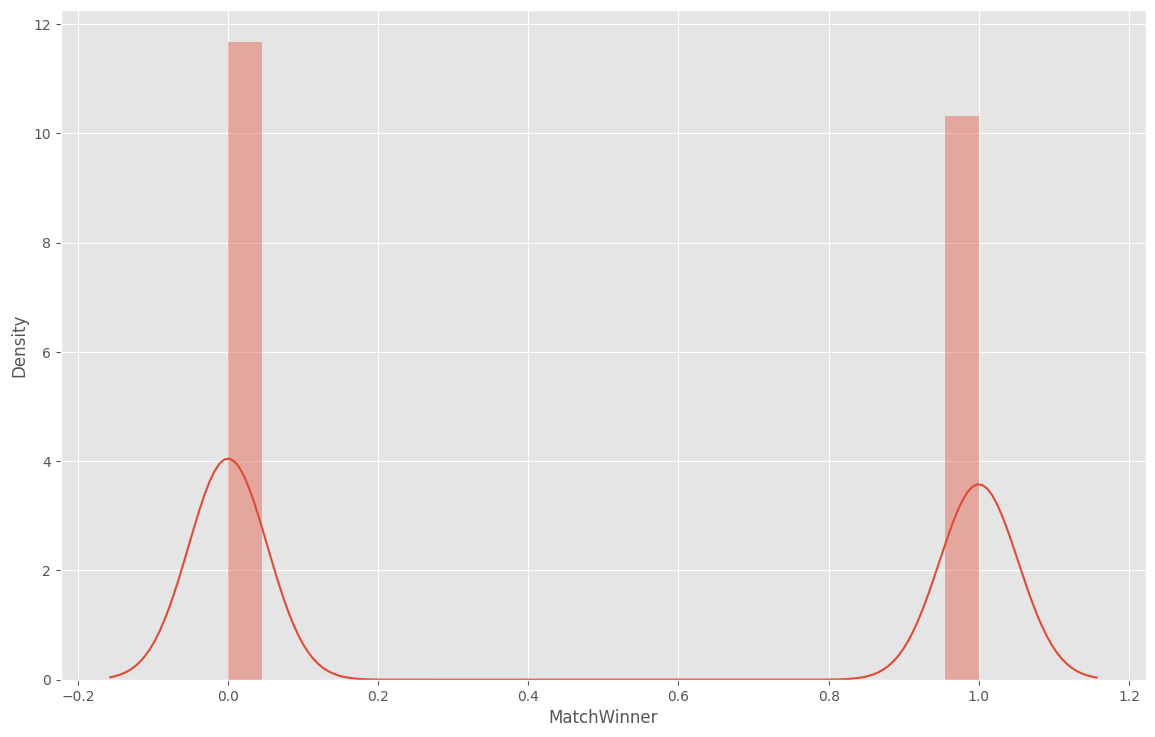

In [ ]:
sns.distplot(df.MatchWinner)

In [ ]:
df.shape

(79154, 20)

In [ ]:
df9=df

In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RoundWinner                  79154 non-null  int64  
 1   MatchWinner                  79154 non-null  object 
 2   RoundKills                   79154 non-null  int64  
 3   RoundAssists                 79154 non-null  int64  
 4   RoundHeadshots               79154 non-null  int64  
 5   RoundFlankKills              79154 non-null  int64  
 6   RoundStartingEquipmentValue  79154 non-null  int64  
 7   TeamStartingEquipmentValue   79154 non-null  int64  
 8   MatchKills                   79154 non-null  int64  
 9   MatchFlankKills              79154 non-null  int64  
 10  MatchAssists                 79154 non-null  int64  
 11  MatchHeadshots               79154 non-null  int64  
 12  Terrorist                    79154 non-null  int64  
 13  CounterTerrorist

In [ ]:
df.shape

(79154, 20)

In [ ]:
df= df

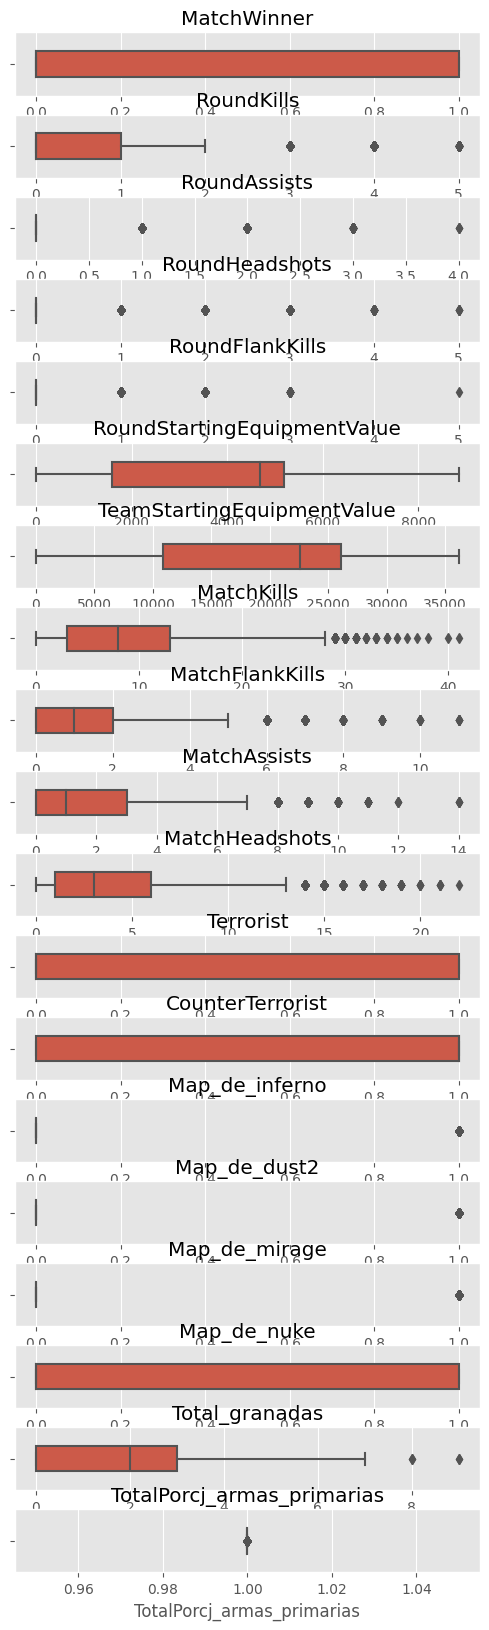

In [ ]:
# revisar outliers y valores extremos ....(cantidades numericas), datos negativos segun la variable
col_numericas=[ 'MatchWinner', 'RoundKills','RoundAssists','RoundHeadshots','RoundFlankKills','RoundStartingEquipmentValue','TeamStartingEquipmentValue','MatchKills','MatchFlankKills','MatchAssists','MatchHeadshots','Terrorist', 'CounterTerrorist',  'Map_de_inferno', 'Map_de_dust2', 'Map_de_mirage', 'Map_de_nuke', 'Total_granadas', 'TotalPorcj_armas_primarias']

fig, ax= plt.subplots(nrows=19, ncols=1, figsize=(6,20))
fig.subplots_adjust(hspace=0.3)

for i, col in enumerate(col_numericas):
  sns.boxplot(x=col, data=df8, ax=ax[i], width=0.4)
  ax[i].set_title(col)

In [ ]:
df.shape

(79154, 20)

In [ ]:
df2=df

In [ ]:
df.columns

Index(['RoundWinner', 'MatchWinner', 'RoundKills', 'RoundAssists',
       'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
       'MatchAssists', 'MatchHeadshots', 'Terrorist', 'CounterTerrorist',
       'Map_de_inferno', 'Map_de_dust2', 'Map_de_mirage', 'Map_de_nuke',
       'Total_granadas', 'TotalPorcj_armas_primarias'],
      dtype='object')

In [ ]:
df = df.drop(['RoundAssists','RoundHeadshots','RoundFlankKills', 'Map_de_inferno', 'Map_de_dust2', 'Map_de_mirage', 'TotalPorcj_armas_primarias'], axis=1)

In [ ]:
df.shape

(73228, 13)

In [ ]:
def remove_outliers(df, columns, threshold=1.5):
    outliers_indices = []

    for column in columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_indices.extend(outliers.index)

    cleaned_df = df.drop(outliers_indices)

    return cleaned_df


In [ ]:
print(cleaned_df)

       RoundWinner MatchWinner  RoundKills  RoundStartingEquipmentValue  \
0                0        True           0                          750   
1                0        True           0                          800   
2                0        True           0                         1000   
3                0        True           0                          850   
4                0        True           0                         1000   
...            ...         ...         ...                          ...   
79151            1        True           1                         2550   
79152            0       False           0                         5600   
79153            0       False           1                         5500   
79154            0       False           0                         4950   
79155            0       False           0                         4950   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                  

In [ ]:


columns_to_clean = ['RoundWinner', 'RoundKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'Terrorist', 'CounterTerrorist', 'Map_de_nuke', 'Total_granadas']

cleaned_df = remove_outliers(df, columns_to_clean)
df=cleaned_df
print("Dataframe original:")
print(df)
print("\nDataframe limpiado:")
print(cleaned_df)


Dataframe original:
       RoundWinner MatchWinner  RoundKills  RoundStartingEquipmentValue  \
0                0        True           0                          750   
1                0        True           0                          800   
2                0        True           0                         1000   
3                0        True           0                          850   
4                0        True           0                         1000   
...            ...         ...         ...                          ...   
79151            1        True           1                         2550   
79152            0       False           0                         5600   
79153            0       False           1                         5500   
79154            0       False           0                         4950   
79155            0       False           0                         4950   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \

In [ ]:
df.columns

Index(['RoundWinner', 'MatchWinner', 'RoundKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'Terrorist', 'CounterTerrorist', 'Map_de_nuke', 'Total_granadas'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   RoundWinner                  79154 non-null  int64 
 1   MatchWinner                  79154 non-null  object
 2   RoundKills                   79154 non-null  int64 
 3   RoundStartingEquipmentValue  79154 non-null  int64 
 4   TeamStartingEquipmentValue   79154 non-null  int64 
 5   MatchKills                   79154 non-null  int64 
 6   MatchFlankKills              79154 non-null  int64 
 7   MatchAssists                 79154 non-null  int64 
 8   MatchHeadshots               79154 non-null  int64 
 9   Terrorist                    79154 non-null  int64 
 10  CounterTerrorist             79154 non-null  int64 
 11  Map_de_nuke                  79154 non-null  int64 
 12  Total_granadas               79154 non-null  int64 
dtypes: int64(12), object(1)
memory 

Visualizamos en formato de historial las características de entrada con nombres y podemos ver gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros

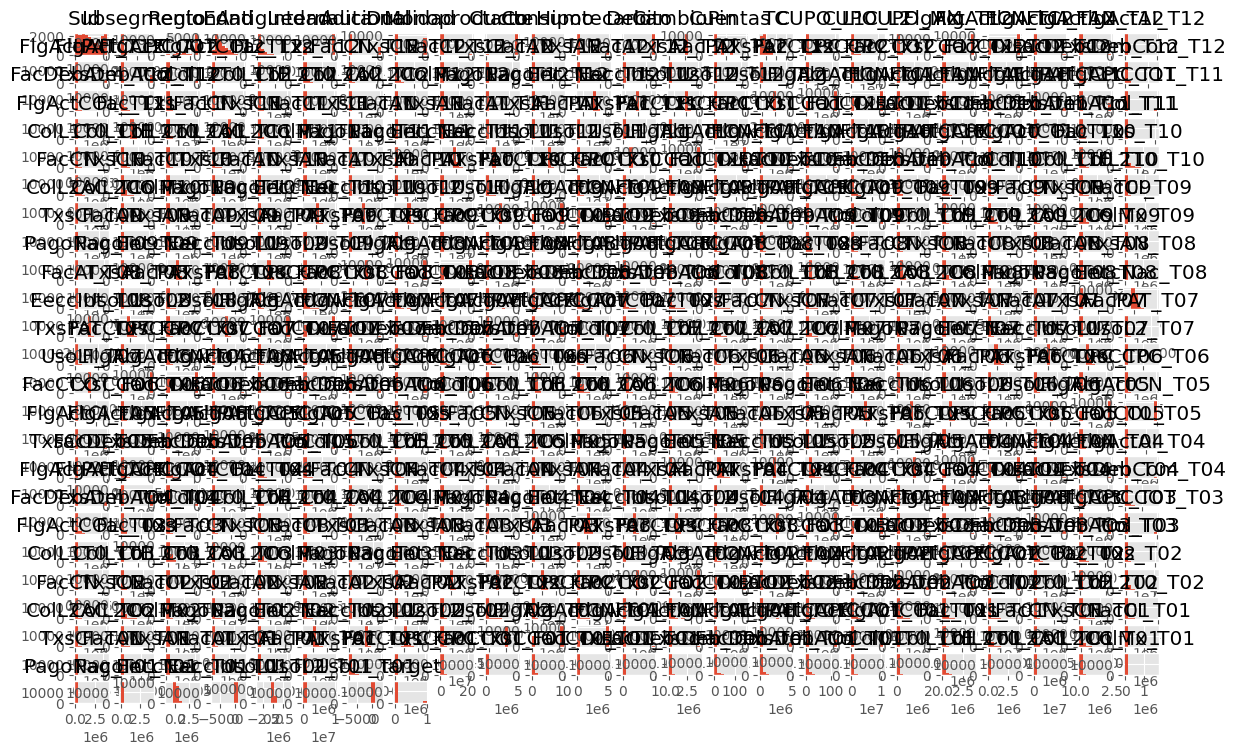

In [14]:
df.drop(['Renta'],1).hist()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   RoundWinner                  79154 non-null  int64 
 1   MatchWinner                  79154 non-null  object
 2   RoundKills                   79154 non-null  int64 
 3   RoundStartingEquipmentValue  79154 non-null  int64 
 4   TeamStartingEquipmentValue   79154 non-null  int64 
 5   MatchKills                   79154 non-null  int64 
 6   MatchFlankKills              79154 non-null  int64 
 7   MatchAssists                 79154 non-null  int64 
 8   MatchHeadshots               79154 non-null  int64 
 9   Terrorist                    79154 non-null  int64 
 10  CounterTerrorist             79154 non-null  int64 
 11  Map_de_nuke                  79154 non-null  int64 
 12  Total_granadas               79154 non-null  int64 
dtypes: int64(12), object(1)
memory 

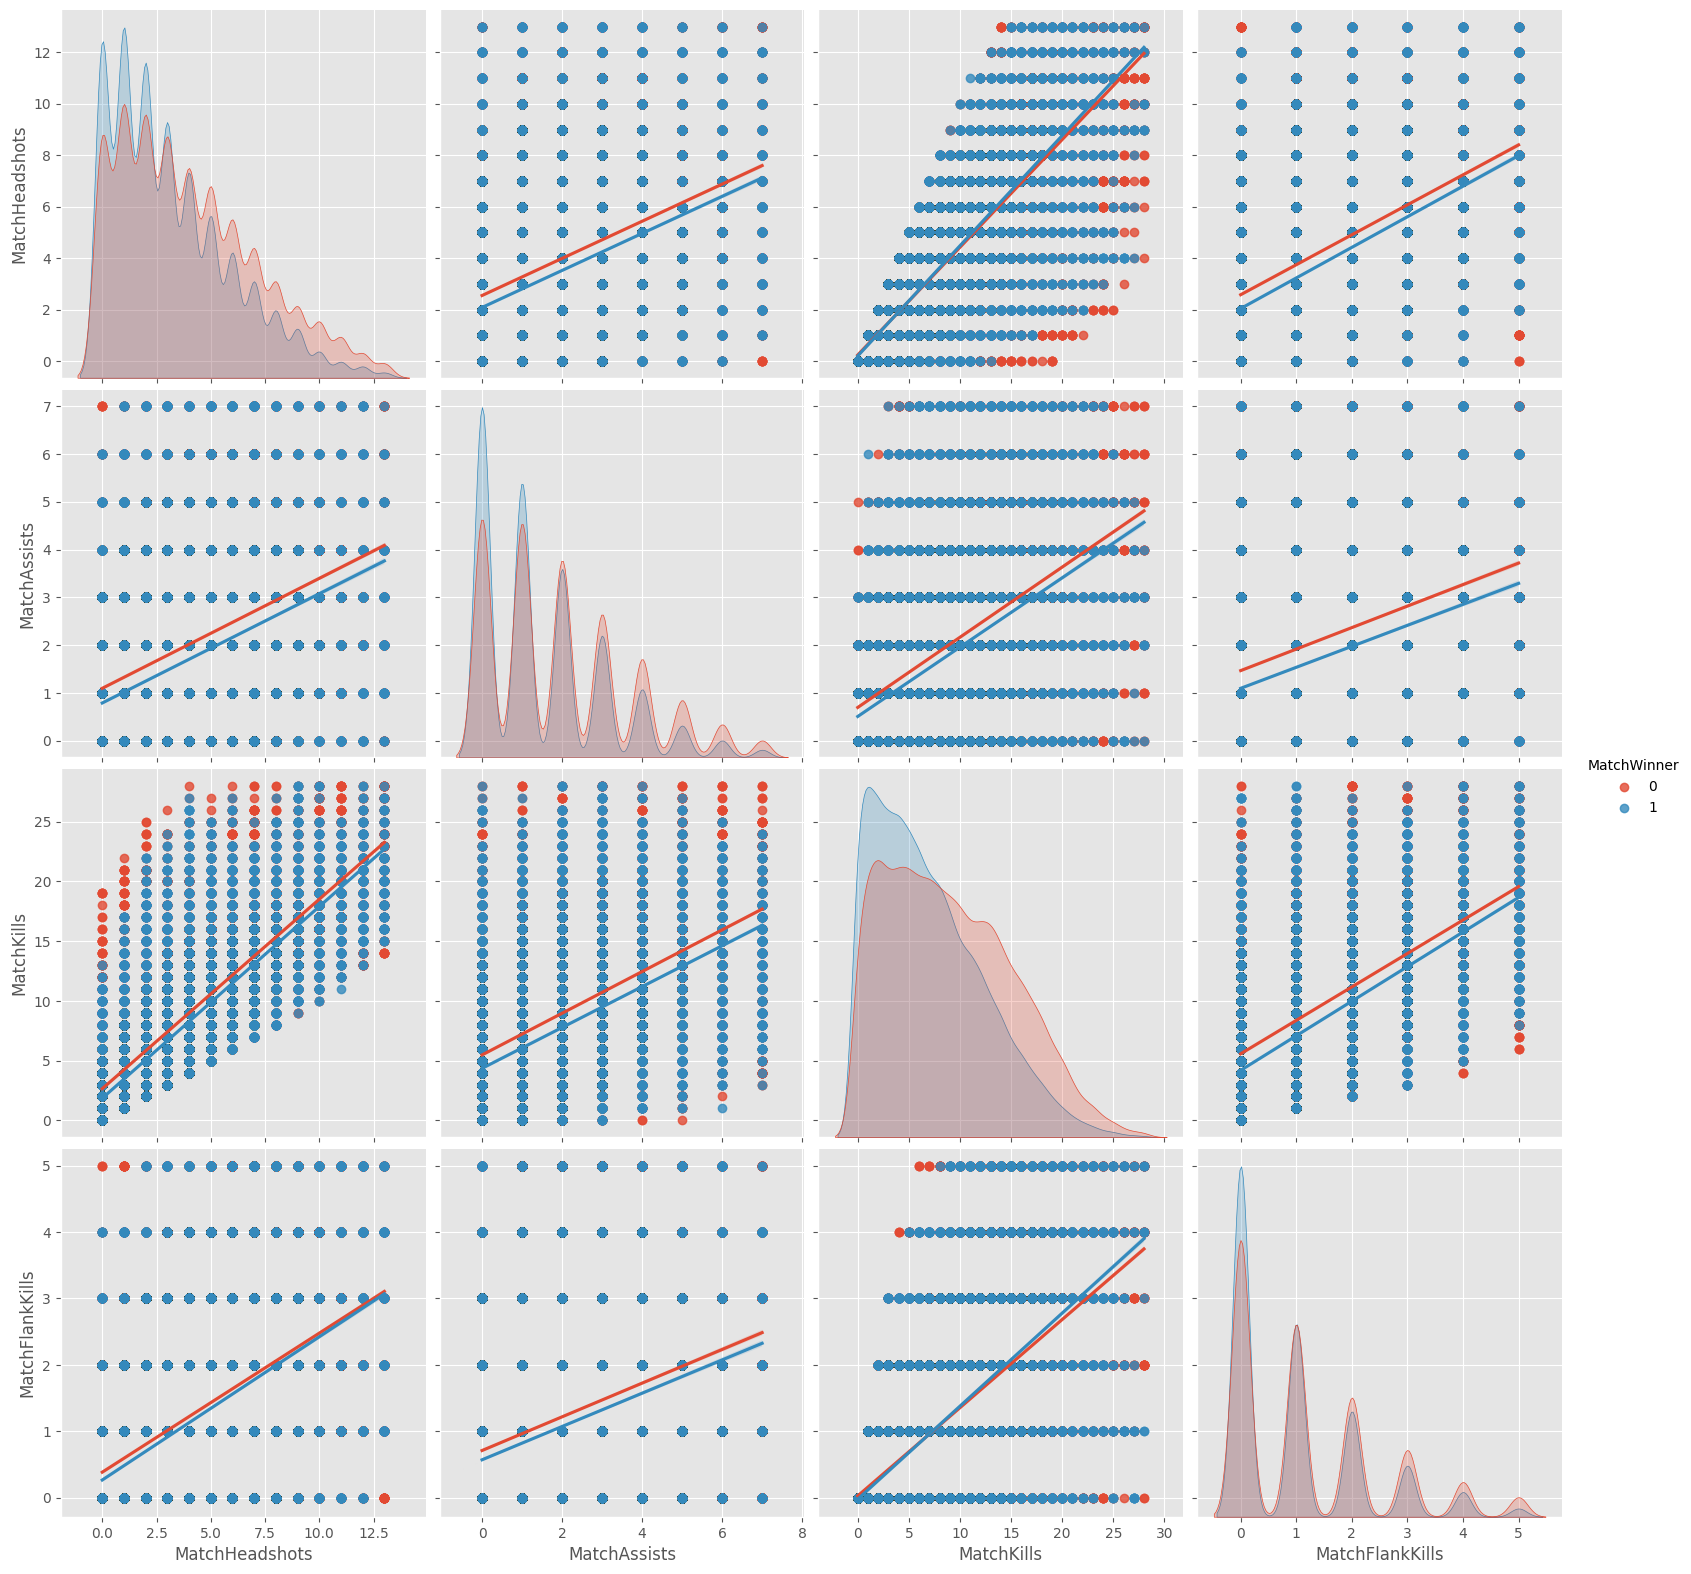

In [ ]:
sns.pairplot(df.dropna(), hue='MatchWinner',size=4,vars=["MatchHeadshots", "MatchAssists","MatchKills","MatchFlankKills"],kind='reg')

También podemos interrelacionar las entradas de a pares, para

ver como se concentran linealmente las salidas de usuarios por colores

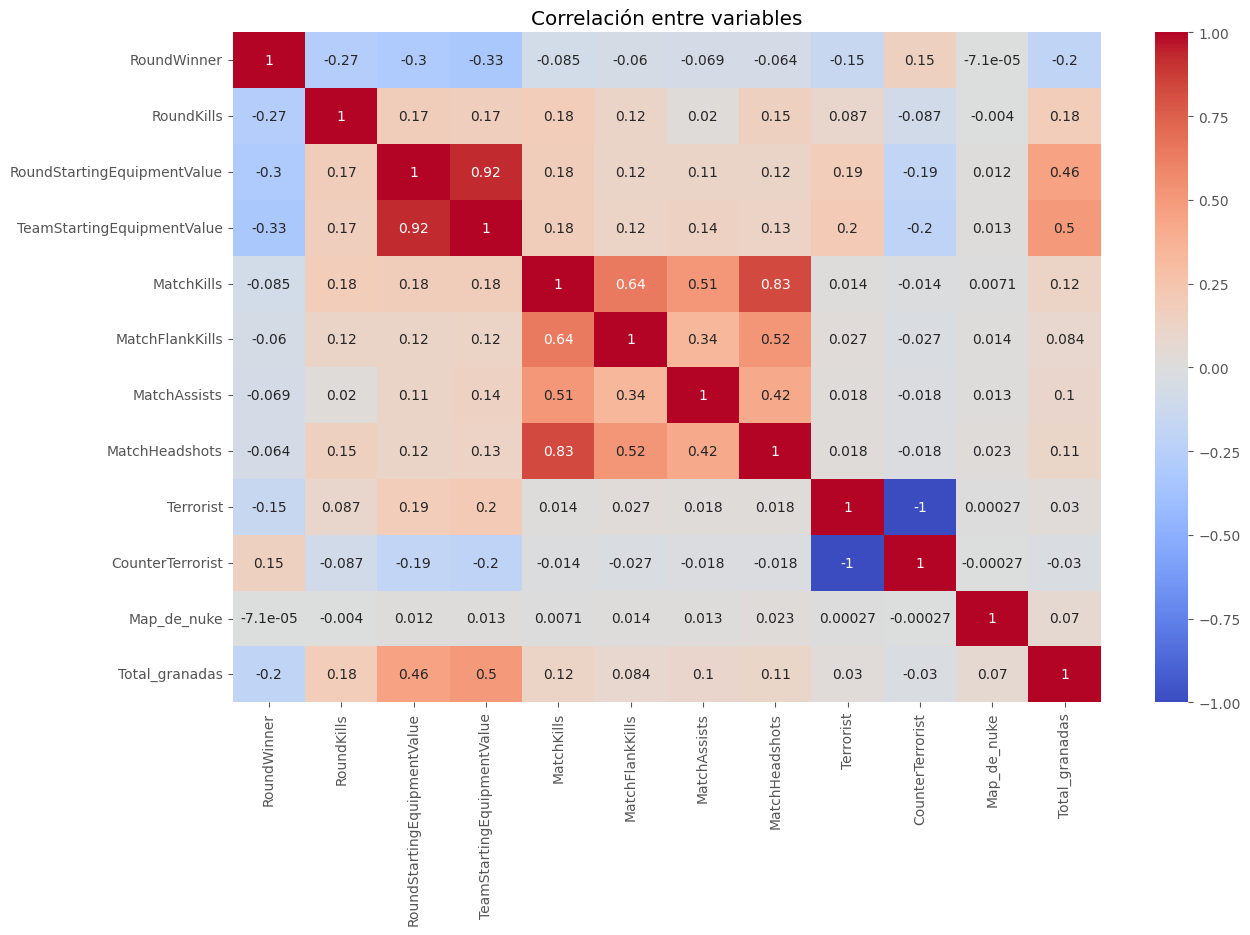

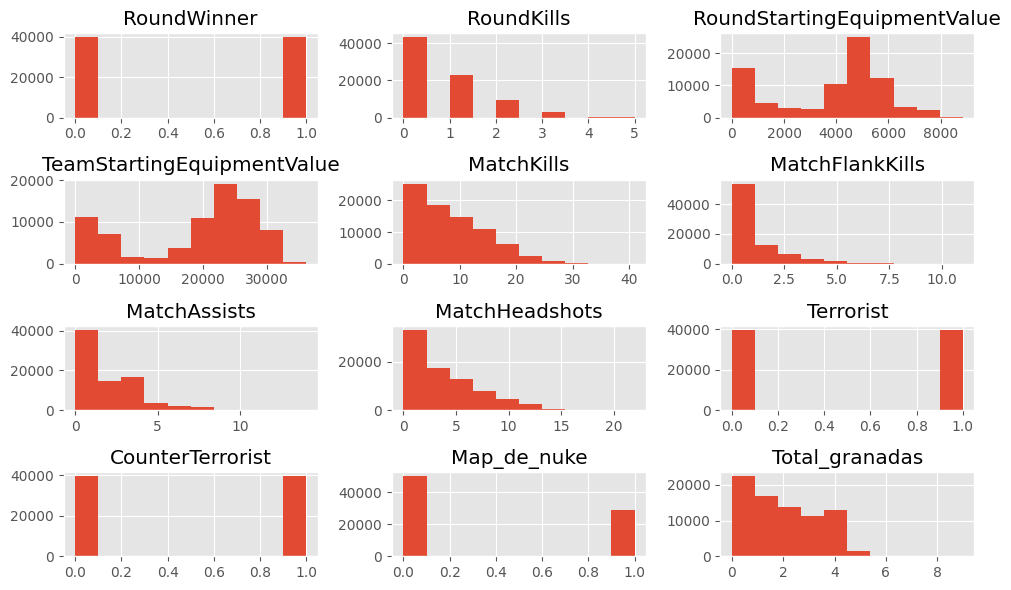

In [ ]:
# Visualizar la correlación entre las variables
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

# Graficar histogramas de variables numéricas
df.hist(figsize=(6, 6))
plt.tight_layout()
plt.show()

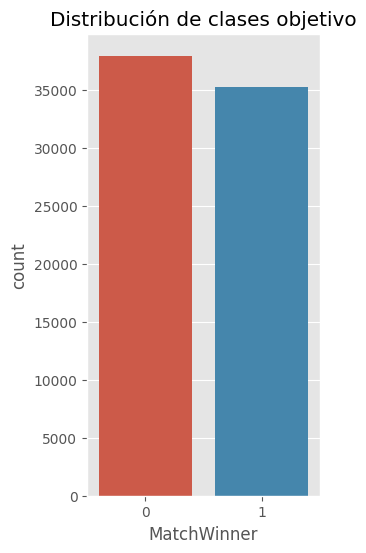

In [ ]:


# Visualizar la distribución de las clases objetivo
plt.figure(figsize=(3, 6))  # Ajustar el tamaño del gráfico
sns.countplot(x='MatchWinner', data=df)
plt.title('Distribución de clases objetivo')
plt.show()


In [ ]:
df3=df

In [ ]:
df3.shape

(73228, 11)

In [ ]:
df.columns

Index(['RoundWinner', 'MatchWinner', 'RoundKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'Terrorist', 'CounterTerrorist', 'Map_de_nuke', 'Total_granadas'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   RoundWinner                  79154 non-null  int64 
 1   MatchWinner                  79154 non-null  object
 2   RoundKills                   79154 non-null  int64 
 3   RoundStartingEquipmentValue  79154 non-null  int64 
 4   TeamStartingEquipmentValue   79154 non-null  int64 
 5   MatchKills                   79154 non-null  int64 
 6   MatchFlankKills              79154 non-null  int64 
 7   MatchAssists                 79154 non-null  int64 
 8   MatchHeadshots               79154 non-null  int64 
 9   Terrorist                    79154 non-null  int64 
 10  CounterTerrorist             79154 non-null  int64 
 11  Map_de_nuke                  79154 non-null  int64 
 12  Total_granadas               79154 non-null  int64 
dtypes: int64(12), object(1)
memory 

In [ ]:
df1.columns

Index(['RoundWinner', 'MatchWinner', 'RoundKills', 'RoundAssists',
       'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
       'MatchAssists', 'MatchHeadshots', 'Terrorist', 'CounterTerrorist',
       'Map_de_inferno', 'Map_de_dust2', 'Map_de_mirage', 'Map_de_nuke',
       'Total_granadas', 'TotalPorcj_armas_primarias'],
      dtype='object')




## Fase 4: Modeling

### Clasificación



In [ ]:
df['MatchWinner'] = df['MatchWinner'].map({True: 1, False: 0})

In [ ]:
df.shape

(79154, 13)

In [ ]:
df.columns

Index(['RoundWinner', 'MatchWinner', 'RoundKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'Terrorist', 'CounterTerrorist', 'Map_de_nuke', 'Total_granadas'],
      dtype='object')

## Vemos Desbalanceo

In [ ]:
pd.value_counts(df1['MatchWinner'], sort = True)

0    42016
1    37138
Name: MatchWinner, dtype: int64

In [ ]:
#Gana_df2 = df2[df2.MatchWinner == 1] #gana partida
#Pierde_df2 = df2[df2.MatchWinner == 0] #pierde partida

## Creamos Dataset

In [ ]:
# Extraemos la variable que vamos a estimar.
X = df.drop(['MatchWinner'],axis=1)
y = df['MatchWinner']


In [ ]:
y.unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
79152    0
79153    0
79154    0
79155    0
79156    0
Name: MatchWinner, Length: 79154, dtype: int64>

In [ ]:
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
LABELS = ['Pierde', 'Gana']

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Verdadero MatchWinner')
    plt.xlabel('Predicted MatchWinner')
    plt.show()
    print (classification_report(y_test, pred_y))

esta función se utiliza para visualizar la matriz de confusión y mostrar un informe de clasificación con métricas de evaluación para un modelo de clasificación.

y_test :son los valores reales del conjunto de datos de prueba, las etiquetas o la variable objetivo que se   trata de predecir.
pred_y : son las predicciones del modelo en el conjunto de datos de prueba.

## Ejecutamos Modelo Regresion Logistica

Que jugadores van a ganar la partida y segun ciertas caracteristicas

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

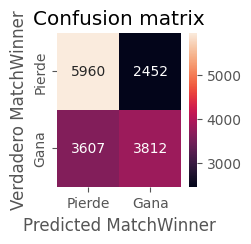

              precision    recall  f1-score   support

           0       0.62      0.71      0.66      8412
           1       0.61      0.51      0.56      7419

    accuracy                           0.62     15831
   macro avg       0.62      0.61      0.61     15831
weighted avg       0.62      0.62      0.61     15831



In [ ]:
# Crear y ajustar el modelo de regresión logística (o cualquier otro modelo)
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
pred_y = model.predict(X_test)

# Evaluar el desempeño del modelo utilizando la función mostrar_resultados
mostrar_resultados(y_test, pred_y)


##

In [ ]:
from sklearn.metrics import roc_auc_score
roc_value_lr = roc_auc_score(y_test, pred_y)
print(roc_value_lr)

0.6111637640872348


###Se hace una búsqueda de los mejores hiperparámetros utilizando validación cruzada.


LogisticRegression GridSearchCV


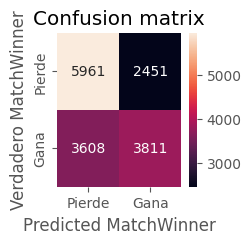

              precision    recall  f1-score   support

           0       0.62      0.71      0.66      8412
           1       0.61      0.51      0.56      7419

    accuracy                           0.62     15831
   macro avg       0.62      0.61      0.61     15831
weighted avg       0.62      0.62      0.61     15831



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#modelo entrenado para encontrar los mejores hiperparametros
# Crear el objeto del modelo
model_lr = LogisticRegression()

# Definir los hiperparámetros a ajustar
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2']}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5)

# Entrenar el modelo con los datos de entrenamiento
grid_search_lr.fit(X_train, y_train)

# Obtener las predicciones en el conjunto de prueba
pred_y = grid_search_lr.predict(X_test)

# Mostrar los resultados
print()
print("LogisticRegression GridSearchCV")
mostrar_resultados(y_test, pred_y)


In [ ]:
from sklearn.metrics import roc_auc_score
roc_value_Gr_search = roc_auc_score(y_test, pred_y)
print(roc_value_Gr_search)

0.6236808494167613


este código se utiliza para entrenar un modelo de regresión logística balanceado y obtener el modelo ajustado para su posterior uso en la predicción y evaluación.






LogisticRegression balanceada


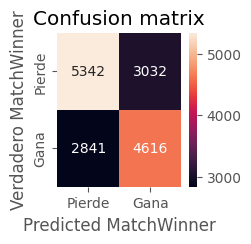

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      8374
           1       0.60      0.62      0.61      7457

    accuracy                           0.63     15831
   macro avg       0.63      0.63      0.63     15831
weighted avg       0.63      0.63      0.63     15831



In [ ]:
#Se ajusta con parametros definidos
def run_model_balanced(X_train, X_test, y_train, y_test):
    model = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver="newton-cg", class_weight="balanced")
    model.fit(X_train, y_train)
    pred_y_lrb = model.predict(X_test)
    mostrar_resultados(y_test, pred_y_lrb)
    return model
print("LogisticRegression balanceada")
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y_lrb = model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_value_b = roc_auc_score(y_test, pred_y_lrb)
print(roc_value_b)

0.6284713033012551


###Se ajusta directamente con parámetros predefinidos

La interpretación del informe de clasificación :precision: el 64% de las instancias clasificadas como clase 0(false) son realmente clase 0.La etiqueta 1(true) la precisión es del 57%, lo que indica que el 57% de las instancias clasificadas como clase 1 son realmente clase 1.

Recall: Positivas que se identifican correctamente. Para la clase 0, el recall es del 58%, lo que significa que se identifican correctamente el 58% de las instancias reales de clase 0. Para la clase 1, el recall es del 62%, lo que indica que se identifican correctamente el 62% de las instancias reales de clase 1.Un valor alto de recall indica que el modelo puede capturar bien los casos positivos.

F1-score: Es una medida que combina la precisión y el recall en un solo valor. Es útil cuando hay un desequilibrio entre las clases. El F1-score para la clase 0 es del 61%, mientras que para la clase 1 es del 59%.Un F1-score alto indica un equilibrio entre la precisión y el recall.

Support: Es el número de instancias en cada clase.

Accuracy: Es la proporción de instancias clasificadas correctamente sobre el total de instancias.La precisión general del modelo es del 60%.

Macro avg: Es el promedio de las métricas (precision, recall, F1-score) para todas las clases, sin tener en cuenta el desequilibrio de clases.

Weighted avg: Es el promedio ponderado de las métricas para todas las clases, teniendo en cuenta el desequilibrio de clases.







el modelo tiene una precisión y recall bastante similares para ambas clases, lo que indica que no hay un sesgo hacia una clase en particular. El F1-score también es relativamente similar para ambas clases. La precisión global del modelo es del 60%, lo que indica que está clasificando correctamente el 60% de las instancias en general.

Para determinar si el modelo es adecuado o no, es importante considerar otras métricas de evaluación, como el área bajo la curva ROC (AUC-ROC)que evaluar la capacidad de discriminación del modelo y la curva ROC para visualizar el equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos a través de diferentes umbrales de clasificación.

Este código solo muestra los resultados de evaluación y visualización, pero necesitas entrenar y ajustar los modelos por separado antes de utilizarlo.






In [ ]:
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5342 3032]
 [2841 4616]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      8374
           1       0.60      0.62      0.61      7457

    accuracy                           0.63     15831
   macro avg       0.63      0.63      0.63     15831
weighted avg       0.63      0.63      0.63     15831



In [ ]:

# Hacer predicciones en los datos de prueba

predictions = model.predict(X_test)
print(predictions[0:10])

[1 0 0 1 1 0 1 0 1 0]


In [ ]:
model.score(X,y)

0.6182631326275362

In [ ]:
from sklearn.metrics import roc_auc_score
roc_value_lr = roc_auc_score(y_test, pred_y_lr)
print(roc_value_lr)

0.5035531385179627


###Probamos con Random Forest.....


Nivel de exactitud de este modelo.  construir múltiples árboles de decisión y combinar sus predicciones,

##Random Forest

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.4s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


Randomforest


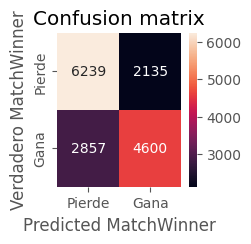

              precision    recall  f1-score   support

           0       0.69      0.75      0.71      8374
           1       0.68      0.62      0.65      7457

    accuracy                           0.68     15831
   macro avg       0.68      0.68      0.68     15831
weighted avg       0.68      0.68      0.68     15831



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo con 100 arboles
model_rf = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
# entrenar!
model_rf.fit(X_train, y_train)
# Obtener las predicciones en el conjunto de prueba
pred_y_rf = model_rf.predict(X_test)
# Mostrar los resultados
print("Randomforest")
mostrar_resultados(y_test, pred_y_rf)

0.6392306930700478
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 4, 'n_estimators': 10}
Gridsearchcv RandomForest


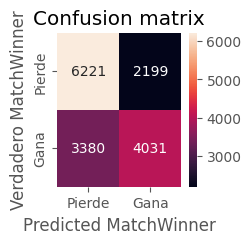

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      8420
           1       0.65      0.54      0.59      7411

    accuracy                           0.65     15831
   macro avg       0.65      0.64      0.64     15831
weighted avg       0.65      0.65      0.64     15831



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

model_gr = RandomForestClassifier()

params = {"n_estimators": [10],
          "max_depth": [2,3],
          "min_samples_split": [2,3,4],
          "max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model_gr, param_grid=params,cv=5)
_=grid.fit(Xtrain, ytrain)
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)
y_pred = grid.predict(Xtest)
print("Gridsearchcv RandomForest")
mostrar_resultados(ytest, y_pred)

## Ensamblados

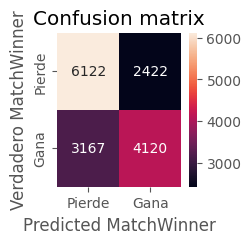

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      8544
           1       0.63      0.57      0.60      7287

    accuracy                           0.65     15831
   macro avg       0.64      0.64      0.64     15831
weighted avg       0.65      0.65      0.64     15831



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
rand = RandomForestClassifier()
model_rand = BaggingClassifier(rand, n_estimators=10)

params = {"base_estimator__max_depth": [2,3],
          "max_samples": [0.1,0.2],
          "base_estimator__min_samples_split": [2,3,4]}
grid = GridSearchCV(estimator=model_rand, param_grid=params,cv=5)
_=grid.fit(Xtrain, ytrain)
# Obtener predicciones en los datos de prueba
pred_y = grid.predict(Xtest)

# Mostrar resultados
mostrar_resultados(ytest, pred_y)

Verdaderos positivos: 4120
Falsos positivos: 2411
Falsos negativos: 3167
Verdaderos negativos: 6122
- Precision: el modelo acierta alrededor del 66% de las veces cuando predice la clase 0
-Recall:es la proporción de observaciones  positivas correctamente clasificadas sobre el total.  El modelo captura alrededor del 72% de las instancias de la clase 0 y el 57% de las instancias de la clase 1.
-F1-score: Combina la precisión y el recall . El F1-score para la clase 0 es 0.69 y para la clase 1 es 0.60 Un valor de F1-score más alto indica un mejor equilibrio entre la precisión y el recall.
-Soporte: número de instancias reales de cada clase en el conjunto de datos de prueba.La clase 0 es 8444 y para la clase 1 es 7287.
Accuracy: es la proporción de predicciones correctas sobre el total de instancias. La exactitud es 0.65, lo que significa que el modelo clasifica correctamente alrededor del 65% de todas las instancias del conjunto de datos de prueba.
Promedio Ponderado: El promedio ponderado de la precisión, recall y F1-score es 0.64 ,de muestras reales en cada clase.

GridSearchCV. Esta clase realiza una búsqueda exhaustiva de las mejores combinaciones de hiperparámetros utilizando validación cruzada.

-Bagging es una técnica de ensamblado que combina múltiples modelos de aprendizaje en paralelo para mejorar la precisión y la estabilidad de las predicciones.

## Fase 5: Evaluation

# CURVA ROC

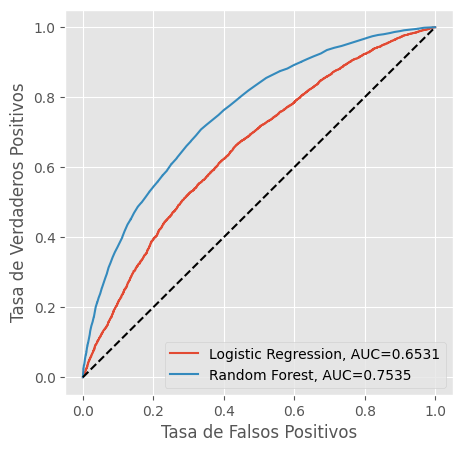

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Definir el tamaño del gráfico
plt.figure(figsize=(5, 5))

# Ajustar el modelo de regresión logística y trazar la curva ROC
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr, tpr, label="Logistic Regression, AUC="+str(auc))

# Ajustar el modelo de Random Forest y trazar la curva ROC
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr, tpr, label="Random Forest, AUC="+str(auc))

# Agregar los ejes x e y y la línea de clasificación
plt.plot([0, 1], [0, 1], 'k--')  # Línea de clasificación
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


clasificador aleatorio (1.00,1.00) , valor minimo area bajo la curva roc es de 0,5

 el modelo random Forest hace un mejor trabajo al clasificar los datos en categorías en comparación
 con el modelo de regresión logística.

Regresión Logística  con un AUC =0,6531 indica que tiene un rendimiento moderado en la clasificación de instancias positivas y negativas. Un valor de 0.65 indica que el modelo tiene una capacidad razonable para distinguir entre las clases y tomar decisiones de clasificación.

El modelo RANFOM fOREST tiene una capacidad de discriminación alta para distinguir entre las clases positivas y negativas. Cuanto más cercano a 1 sea el valor, mejor será la capacidad de discriminación del modelo. La capacidad del modelo para distinguir correctamente entre las diferentes clases o categorías de la variable objetivo,a la capacidad del modelo para clasificar correctamente los casos positivos como positivos y los casos negativos como negativos.Un modelo con una buena discriminación tiene la capacidad de separar claramente las diferentes clases en función de las características y los patrones de los datos. Esto implica que el modelo puede identificar correctamente los casos positivos y negativos, lo que resulta en una clasificación más precisa y confiable.



En la curva ROC, se busca que el área bajo la curva (AUC) sea lo más cercana posible a 1, ya que esto indica un mejor rendimiento del modelo. Un AUC de 0.5 indica un rendimiento aleatorio o similar al azar, mientras que un AUC de 1 indica un rendimiento perfecto en relacion a la capacidad de discriminación entre las clases positiva y negativa.






La curva se crea trazando la tasa de verdaderos positivos (TPR) en el eje y y la tasa de falsos positivos (FPR) en el eje x para diferentes valores de umbral.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Ajustar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X, y)

# Obtener los coeficientes del modelo
coeficientes = model.coef_

# Obtener los nombres de las variables predictoras
nombres_variables = X.columns

# Crear un dataframe para visualizar los coeficientes
df_coeficientes = pd.DataFrame({'Variable Predictoras': nombres_variables, 'Coeficiente': coeficientes.flatten()})

# Ordenar los coeficientes de forma descendente por su magnitud absoluta
df_coeficientes['Magnitud'] = df_coeficientes['Coeficiente'].abs()
df_coeficientes = df_coeficientes.sort_values('Magnitud', ascending=False)

# Imprimir los coeficientes en orden descendente
print(df_coeficientes)


           Variable Predictoras  Coeficiente  Magnitud
0                   RoundWinner     0.630003  0.630003
9              CounterTerrorist     0.250611  0.250611
6                  MatchAssists    -0.107935  0.107935
1                    RoundKills    -0.101095  0.101095
8                     Terrorist     0.090423  0.090423
10                  Map_de_nuke     0.064678  0.064678
11               Total_granadas    -0.059579  0.059579
5               MatchFlankKills     0.039653  0.039653
4                    MatchKills    -0.038183  0.038183
7                MatchHeadshots    -0.006948  0.006948
3    TeamStartingEquipmentValue    -0.000018  0.000018
2   RoundStartingEquipmentValue     0.000007  0.000007


Coeficientes con valores más altos (positivos o negativos) indicarán una mayor influencia en la predicción.
TotalPorcj_armas_primarias:coeficiente positivo=0.276020,  un incremento en ella está asociado con un aumento en la probabilidad de ser el ganador del partido. La magnitud del coeficiente sugiere que esta variable tiene una influencia significativa en la predicción.

CounterTerrorist: coeficiente positivo de 0.216406, lo que indica que estar en este equipo está asociado con una mayor probabilidad de ser el ganador del partido.

RoundAssists: coeficiente negativo =-0.199345, lo que sugiere que un aumento en el número de asistencias por ronda está relacionado con una disminución en la probabilidad de ser el ganador del partido.
RoundKills,Total_granadas: coeficientes negativos, lo que indica que un incremento en el número de kills por ronda y en el número total de granadas utilizadas están asociados con una disminución en la probabilidad de ser el ganador del partido.
Los coeficientes de regresión representan la relación relativa entre una variable predictora y la variable objetivo, es decir, cómo un cambio en la variable predictora se relaciona con un cambio proporcional en la variable objetivo.











In [ ]:
predictions = model.predict(X_test)

# Reiniciar los índices de y_test
y_test.reset_index(drop=True, inplace=True)

for i in range(10):
    print("Predicción:", predictions[i])
    print("Valor real:", y_test[i])
    print("---")


Predicción: 1
Valor real: 1
---
Predicción: 1
Valor real: 1
---
Predicción: 0
Valor real: 0
---
Predicción: 1
Valor real: 1
---
Predicción: 0
Valor real: 1
---
Predicción: 0
Valor real: 0
---
Predicción: 0
Valor real: 0
---
Predicción: 0
Valor real: 1
---
Predicción: 0
Valor real: 1
---
Predicción: 0
Valor real: 0
---


## Fase 6 Deployment

In [ ]:
pip install flask

In [ ]:
python app.py


In [ ]:
python -- version

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return '¡Hola, mundo!'

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
from flask import Flask, render_template, request
import joblib


In [ ]:
#joblib.dump(model_rf, 'modelo_rf.pkl')


In [ ]:
#joblib.dump(grid_search_lr, 'modelo_lr.pkl')


In [ ]:
from flask import Flask, render_template, request
import joblib

app = Flask(__name__)

# Cargar los modelos
modelo_rf = joblib.load('modelo_rf.pkl')
modelo_lr = joblib.load('modelo_lr.pkl')

@app.route('/')
def home():
    return render_template('formulario.html')

@app.route('/predict', methods=['POST'])
def predict():
    RoundWinner = int(request.form.get('RoundWinner'))
    MatchWinner = int(request.form.get('MatchWinner'))
    RoundKills = int(request.form.get('RoundKills'))
    RoundStartingEquipmentValue = int(request.form.get('RoundStartingEquipmentValue'))
    TeamStartingEquipmentValue = int(request.form.get('TeamStartingEquipmentValue'))
    MatchKills = int(request.form.get('MatchKills'))
    MatchFlankKills = int(request.form.get('MatchFlankKills'))
    MatchAssists = int(request.form.get('MatchAssists'))
    MatchHeadshots = int(request.form.get('MatchHeadshots'))
    Terrorist = int(request.form.get('Terrorist'))
    CounterTerrorist = int(request.form.get('CounterTerrorist'))
    Map_de_nuke = int(request.form.get('Map_de_nuke'))
    Total_granadas = int(request.form.get('Total_granadas'))

    # Realizar predicciones con los modelos
    prediction_rf = modelo_rf.predict([[RoundWinner, MatchWinner, RoundKills, RoundStartingEquipmentValue, TeamStartingEquipmentValue, MatchKills, MatchFlankKills, MatchAssists, MatchHeadshots, Terrorist, CounterTerrorist, Map_de_nuke, Total_granadas]])
    prediction_lr = modelo_lr.predict([[RoundWinner, MatchWinner, RoundKills, RoundStartingEquipmentValue, TeamStartingEquipmentValue, MatchKills, MatchFlankKills, MatchAssists, MatchHeadshots, Terrorist, CounterTerrorist, Map_de_nuke, Total_granadas]])

    return render_template('resultado.html', prediction_rf=prediction_rf[0], prediction_lr=prediction_lr[0])

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
